# ANN for Image Classfication MNIST dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset=torchvision.datasets.MNIST(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 128467596.27it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40786428.90it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40224339.69it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4254249.39it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset=torchvision.datasets.MNIST(
    root='.',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [ ]:
device =('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
Loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
batch_size=128
train_loader=torch.utils.data.DataLoader(train_dataset,
              batch_size=batch_size,
              shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,
              batch_size=batch_size,
              shuffle=False)
for input,target in train_loader:
  print(input.shape)
  break

torch.Size([128, 1, 28, 28])


In [ ]:
n_epoch=10
train_losses=torch.zeros(n_epoch)
test_losses=torch.zeros(n_epoch)
for it in range(n_epoch):
  train_loss=[]
  for input,target in train_loader:
    model.train()
    input,target=input.to(device) , target.to(device)
    input=input.view(-1,784)
    optimizer.zero_grad()
    outputs=model(input)
    error=Loss(outputs,target)
    error.backward()
    optimizer.step()
    train_loss.append(error.item())
  train_losses[it]=np.mean(train_loss)
  test_loss=[]
  for input,target in test_loader:
    model.eval()
    with torch.inference_mode():
    input,target=input.to(device) , target.to(device)
    input=input.view(-1,784)
    outputs=model(input)
    error=Loss(outputs,target)
    test_loss.append(error.item())
  test_losses[it]=np.mean(test_loss)
  print(f'Epoch {it+1}/{n_epoch}, Train Loss:{train_losses[it]}, Test Loss:{test_losses[it]}')

Epoch 1/10, Train Loss:0.4179374575614929, Test Loss:0.22238637506961823
Epoch 2/10, Train Loss:0.1951107233762741, Test Loss:0.15757295489311218
Epoch 3/10, Train Loss:0.14174801111221313, Test Loss:0.127065047621727
Epoch 4/10, Train Loss:0.11025452613830566, Test Loss:0.10975486040115356
Epoch 5/10, Train Loss:0.08923421055078506, Test Loss:0.09934131056070328
Epoch 6/10, Train Loss:0.07424307614564896, Test Loss:0.090920589864254
Epoch 7/10, Train Loss:0.062150269746780396, Test Loss:0.07820919156074524
Epoch 8/10, Train Loss:0.052511829882860184, Test Loss:0.07677143812179565
Epoch 9/10, Train Loss:0.04516388103365898, Test Loss:0.07866150140762329
Epoch 10/10, Train Loss:0.03894578665494919, Test Loss:0.0769713893532753


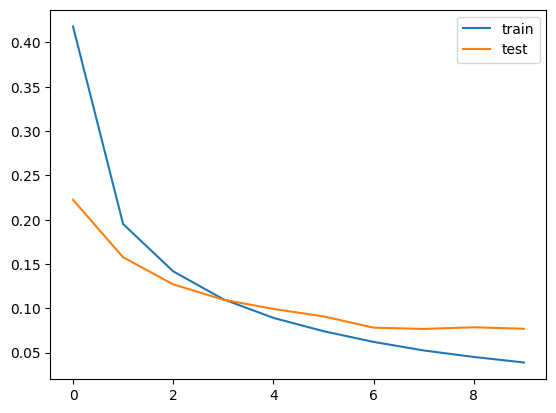

In [ ]:
plt.plot(train_losses,label='train')
plt.plot(test_losses,label='test')
plt.legend()
plt.show()

In [ ]:
n_correct=0
n_total=0
for input,target in train_loader:
  model.train()
  input,target = input.to(device),target.to(device)
  input=input.view(-1,784)
  output=model(input)
  _,predictions = output.max(1)
  n_correct += (predictions == target).sum().item()
  n_total += len(target)
train_acc = n_correct / n_total
n_correct=0
n_total=0
for input,target in test_loader:
  model.eval()
  with torch.inference_mode():
    input,target = input.to(device),target.to(device)
    input=input.view(-1,784)
    output=model(input)
    _,predictions = output.max(1)
    n_correct += (predictions == target).sum().item()
    n_total += len(target)
test_acc = n_correct / n_total

print(f'test accuracy: {test_acc} and train accuracy: {train_acc} ')

test accuracy: 0.9764 and train accuracy: 0.9912166666666666 


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
y_test = test_dataset.targets.numpy()
p_test= np.array([])
for input , target in test_loader:
  input,target = input.to(device) , target.to(device)
  input= input.view(-1,784)
  output = model(input)
  _,perdictions = output.max(1)
  p_test = np.concatenate((p_test,perdictions.cpu().numpy()))

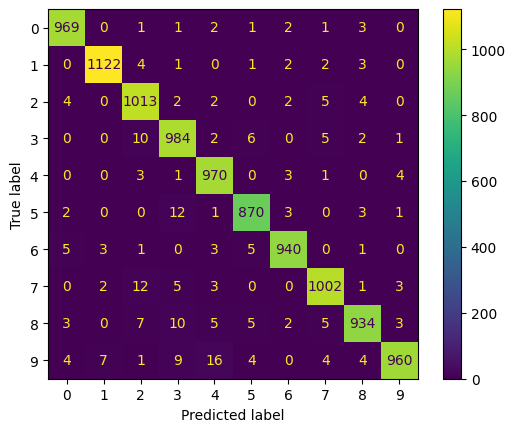

In [ ]:
cm = confusion_matrix(y_test, p_test, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()

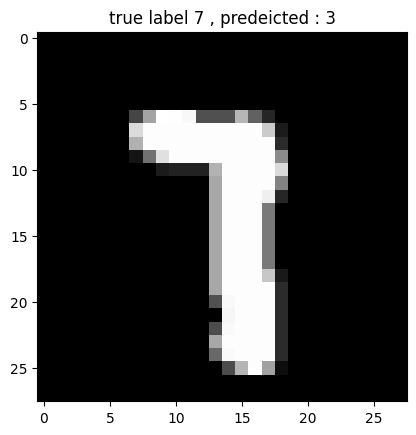

In [ ]:
x_test = test_dataset.data.numpy()
misclassified_idx=np.where(p_test != y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title(f'true label {y_test[i]} , predeicted : {int(p_test[i])}')
plt.show()